<a href="https://colab.research.google.com/github/leonardonels/Colab-python/blob/main/Nuovo_Testamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import

In [ ]:
import pandas as pd
import numpy as np

## import datasets from G-drive using CLI

In [ ]:
from google_drive_downloader import GoogleDriveDownloader

# from https://drive.google.com/file/d/1NpII-GbwxS-8Iu_VtsigCdQNbsfbpF8w/view?usp=drive_link file_id = 1NpII-GbwxS-8Iu_VtsigCdQNbsfbpF8w
GoogleDriveDownloader.download_file_from_google_drive(file_id='1NpII-GbwxS-8Iu_VtsigCdQNbsfbpF8w',
                                                      dest_path='./data.csv',
                                                      unzip=True)
dataset = pd.read_csv("data.csv")
dataset.head(5)

Unzipping...

/usr/local/lib/python3.10/dist-packages/google_drive_downloader/google_drive_downloader.py:78: UserWarning: Ignoring `unzip` since "1NpII-GbwxS-8Iu_VtsigCdQNbsfbpF8w" does not look like a valid zip file
  warnings.warn('Ignoring `unzip` since "{}" does not look like a valid zip file'.format(file_id))


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## import datasets from kaggle using CLI

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saurabhbadole/housing-price-data")

print("Path to dataset files:", path)

dataset = pd.read_csv(f'{path}/Housing_Price_Data.csv')
dataset.head(5)

100%|██████████| 4.65k/4.65k [00:00<00:00, 4.15MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/saurabhbadole/housing-price-data/versions/1


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# number of elementes and null elem checks

In [ ]:
def check(dataset):
  print(f'il dataset continene {dataset.shape[0]} istanze')
  completeness=dataset.isnull().sum().sum()
  if completeness==0:
    print('il dataset è completo')
  else:
    print('il dataset non è completo!')

check(dataset)

il dataset continene 545 istanze
il dataset è completo


# *is true that hauses on the mainroad are pricier?*

In [ ]:
#È vero che le case che affacciano sulla strada principale sono le piu costose?

print(dataset['mainroad'].value_counts())
print('YES MAINROAD TOP 5 PRICE SUM:',dataset[dataset['mainroad']=='yes'].head(5)['price'].sum())
print('NO MAINROAD TOP 5 PRICE SUM:',dataset[dataset['mainroad']=='no'].head(5)['price'].sum())
print('YES MAINROAD AVG PRICE:',dataset[dataset['mainroad']=='yes']['price'].mean())
print('NO MAINROAD AVG PRICE:',dataset[dataset['mainroad']=='no']['price'].mean())

mainroad
yes    468
no      77
Name: count, dtype: int64
YES MAINROAD TOP 5 PRICE SUM: 61425000
NO MAINROAD TOP 5 PRICE SUM: 26705000
YES MAINROAD AVG PRICE: 4991777.329059829
NO MAINROAD AVG PRICE: 3398904.5454545454


In [ ]:
import kagglehub
path = kagglehub.dataset_download("jessicali9530/kuc-hackathon-winter-2018")
train, test = pd.read_csv(f'{path}/drugsComTrain_raw.csv'), pd.read_csv(f'{path}/drugsComTest_raw.csv')
train

100%|██████████| 40.7M/40.7M [00:01<00:00, 39.9MB/s]

Extracting files...


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


# *compute the mean value of a column (rating) based on the value of another column (condition) using only the first 100 most useful elements (review)*

In [ ]:
def rates(dataset):
  ordered=dataset.sort_values(by='usefulCount', ascending=False).head(100)
  print(ordered.groupby('condition')['rating'].mean().sort_values(ascending=False))

rates(train)

condition
Muscle Spasm                 10.000000
Obesity                      10.000000
Panic Disorde                10.000000
Polycystic Ovary Syndrome    10.000000
Urinary Tract Infection      10.000000
emale Infertility            10.000000
Anxiety                       9.923077
Pain                          9.777778
Weight Loss                   9.600000
Depression                    9.405405
Birth Control                 8.888889
Anxiety and Stress            8.444444
Osteoporosis                  6.000000
Name: rating, dtype: float64


# Removes all line breaks from text

In [ ]:
def remove_line_break(text):
    for sign in '\r\n':
        text = text.replace(sign, " ")
    return text

In [ ]:
import kagglehub
path = kagglehub.dataset_download("saurabhbadole/housing-price-data")
taset = pd.read_csv(f'{path}/Housing_Price_Data.csv')

# pivot table

In [ ]:
pd.pivot_table(dataset, values='price', index='guestroom', columns='basement', aggfunc='mean')

basement,no,yes
guestroom,,
no,4.392584e+06,4.959908e+06
yes,5.990788e+06,5.720430e+06


# *histplot*

<Axes: ylabel='Frequency'>

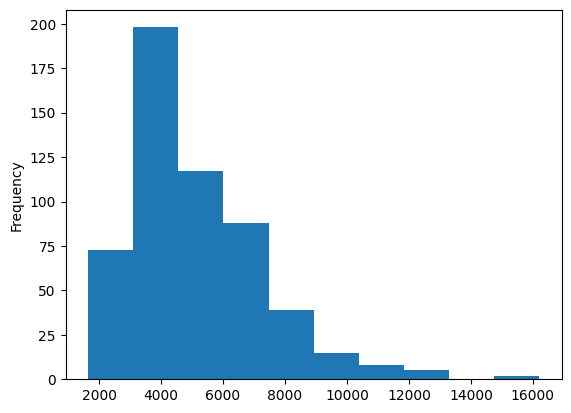

In [ ]:
dataset['area'].plot.hist()

# map

In [ ]:
dataset['furnishingstatus'].map({'unfurnished': 0, 'furnished': 1, 'semi-furnished': 2})

,furnishingstatus
0,1
1,1
2,2
3,1
4,1
...,...
540,0
541,2
542,0
543,1


## map with lambda function

In [ ]:
furnished = [ "furnished", "fsemi-urnished"]

dataset["furnishingstatus"].apply(lambda x: 'yes' if x in furnished else 'no')

,furnishingstatus
0,yes
1,yes
2,no
3,yes
4,yes
...,...
540,no
541,no
542,no
543,yes


In [ ]:
furnished = [ "furnished", "fsemi-urnished"]

dataset["furnishingstatus"].apply(lambda x: 1 if x in furnished else 0)

,furnishingstatus
0,1
1,1
2,0
3,1
4,1
...,...
540,0
541,0
542,0
543,1


# cut (manual binning)

In [ ]:
bins = [1649, 3660, 6150, 9150, 12150, 16200]
labels = ['gruppo1','gruppo2','gruppo3','gruppo4','gruppo5']
dataset['binned_area'] = pd.cut(dataset['area'], bins=bins, labels=labels)

dataset['binned_area'].value_counts()

,count
binned_area,
gruppo2,232
gruppo1,164
gruppo3,124
gruppo4,19
gruppo5,6


# *barplot*

<Axes: xlabel='binned_area'>

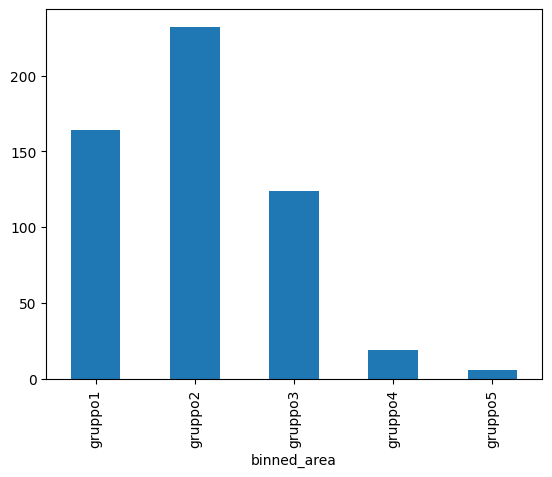

In [ ]:
dataset['binned_area'].value_counts().sort_index().plot.bar()

# groupby

In [ ]:
dataset.groupby('binned_area')['bedrooms'].value_counts()

<ipython-input-17-6928f56cde16>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset.groupby('binned_area')['bedrooms'].value_counts()


binned_area  bedrooms
gruppo1      3            84
             2            55
             4            20
             5             3
             1             1
             6             1
gruppo2      3           125
             2            59
             4            43
             5             3
             1             1
             6             1
gruppo3      3            78
             4            27
             2            16
             5             3
             1             0
             6             0
gruppo4      3             9
             2             5
             4             5
             1             0
             5             0
             6             0
gruppo5      3             4
             2             1
             5             1
             1             0
             4             0
             6             0
Name: count, dtype: int64

# *wide elem selection (elem with column x grater than and colum y grater than)*

In [ ]:
dataset[dataset['bathrooms']>=2][dataset[dataset['bathrooms']>=2]['bedrooms']>=2]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,binned_area
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,gruppo3
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,gruppo3
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,gruppo4
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,gruppo3
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished,gruppo3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3430000,1950,3,2,2,yes,no,yes,no,no,0,yes,unfurnished,gruppo1
446,3150000,3986,2,2,1,no,yes,yes,no,no,1,no,unfurnished,gruppo2
499,2660000,3630,3,3,2,no,yes,no,no,no,0,no,unfurnished,gruppo1
509,2590000,3600,2,2,2,yes,no,yes,no,no,1,no,furnished,gruppo1


# *scatterplot*

<Axes: xlabel='price', ylabel='area'>

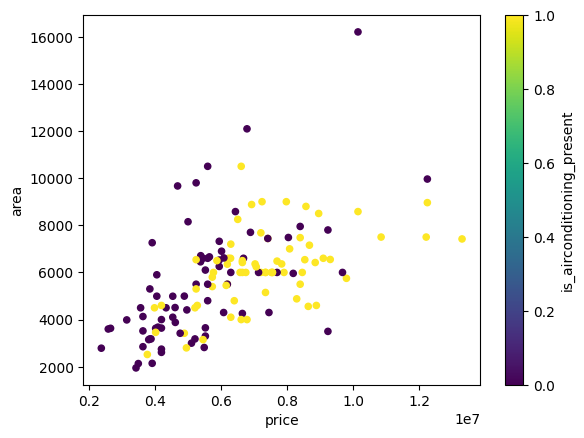

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset['is_airconditioning_present']=le.fit_transform(dataset['airconditioning'])

dataset[dataset['bathrooms']>=2][dataset[dataset['bathrooms']>=2]['bedrooms']>=2].plot.scatter(x='price', y='area', c='is_airconditioning_present', colormap='viridis')

In [ ]:
import kagglehub
from sklearn.model_selection import train_test_split

path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")
dataset = pd.read_csv(f'{path}/heart.csv')

100%|██████████| 8.56k/8.56k [00:00<00:00, 7.22MB/s]

Extracting files...


# drop null elements

In [ ]:
dataset=dataset.dropna()

# label encoder for string columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in dataset.columns:
    if dataset[column].dtype == object:
        dataset[column] = le.fit_transform(dataset[column])

dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


# train and test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataset.drop('HeartDisease', axis=1), dataset['HeartDisease'], test_size=0.25, stratify=dataset['HeartDisease'], random_state=42)

# general models testing

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# any model that needs to be tested goes into the models dictionary.
models = {'Dummy': DummyClassifier(strategy="most_frequent"),
          'Decision Tree': DecisionTreeClassifier(),
          'KNN': KNeighborsClassifier(),
          'LogisticRegression': LogisticRegression(max_iter=10000)}

def test_model(name, model, traindata, testdata, trainlabels, testlabels):
  model.fit(traindata, trainlabels)
  trainpred = model.predict(traindata)
  testpred = model.predict(testdata)
  print(f" ===== {name} =====")
  print(f"Accuracy on train {accuracy_score(trainlabels, trainpred)}")
  print(f"F1score on train {f1_score(trainlabels, trainpred)}")
  print(f"Accuracy on test {accuracy_score(testlabels, testpred)}")
  print(f"F1score on test {f1_score(testlabels, testpred)}")
  print("Confusion matrix on test")
  print(confusion_matrix(testlabels, testpred))

for name, model in models.items():
  test_model(name, model, X_train, X_test, Y_train, Y_test)

 ===== Dummy =====
Accuracy on train 0.5537790697674418
F1score on train 0.7128157156220767
Accuracy on test 0.5521739130434783
F1score on test 0.711484593837535
Confusion matrix on test
[[  0 103]
 [  0 127]]
 ===== Decision Tree =====
Accuracy on train 1.0
F1score on train 1.0
Accuracy on test 0.7913043478260869
F1score on test 0.8032786885245902
Confusion matrix on test
[[84 19]
 [29 98]]
 ===== KNN =====
Accuracy on train 0.7790697674418605
F1score on train 0.8025974025974026
Accuracy on test 0.691304347826087
F1score on test 0.7215686274509804
Confusion matrix on test
[[67 36]
 [35 92]]


In [ ]:
import kagglehub

path = kagglehub.dataset_download("saurabhbadole/housing-price-data")
dataset = pd.read_csv(f'{path}/Housing_Price_Data.csv')

dataset=dataset.dropna()
dataset=dataset.drop(['prefarea'], axis=1) #subjeptive column

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in dataset.columns:
    if dataset[column].dtype == object:
        dataset[column] = le.fit_transform(dataset[column])

dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dataset.drop('price', axis=1), dataset['price'], test_size=0.25, random_state=42)

# simple model testing (linear models)

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_log_error, r2_score

# Calcolo delle metriche
def evaluate_metrics(y_true, y_pred):
    msle = mean_squared_log_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return msle, r2

# Modello LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

# Modello SGDRegressor
sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train, Y_train)
y_train_pred_sgd = sgd.predict(X_train)
y_test_pred_sgd = sgd.predict(X_test)

metrics_lr_train = evaluate_metrics(Y_train, y_train_pred_lr)
metrics_lr_test = evaluate_metrics(Y_test, y_test_pred_lr)
metrics_sgd_train = evaluate_metrics(Y_train, y_train_pred_sgd)
metrics_sgd_test = evaluate_metrics(Y_test, y_test_pred_sgd)

# Risultati
print("Linear Regression:")
print(f"Train - MSLE: {metrics_lr_train[0]:.4f}, R²: {metrics_lr_train[1]:.4f}")
print(f"Test  - MSLE: {metrics_lr_test[0]:.4f}, R²: {metrics_lr_test[1]:.4f}")

print("\nSGD Regressor:")
print(f"Train - MSLE: {metrics_sgd_train[0]:.4f}, R²: {metrics_sgd_train[1]:.4f}")
print(f"Test  - MSLE: {metrics_sgd_test[0]:.4f}, R²: {metrics_sgd_test[1]:.4f}")

print("\nSGDRegression non è indifferente alla scala dei dati come lo è Linear Regression, la presenza della colonna area con valori 1000 volte superiori impedisce a SGDRegression di lavorare correttamente")

Linear Regression:
Train - MSLE: 0.0415, R²: 0.6637
Test  - MSLE: 0.0656, R²: 0.6450

SGD Regressor:
Train - MSLE: 454.3794, R²: -28959554396809699328.0000
Test  - MSLE: 455.3331, R²: -19228510840674193408.0000

SGDRegression non è indifferente alla scala dei dati come lo è Linear Regression, la presenza della colonna area con valori 1000 volte superiori impedisce a SGDRegression di lavorare correttamente


# kbins

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

kbd = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile')
kbd.fit(pd.DataFrame(dataset['area']))

dataset['area']=kbd.transform(pd.DataFrame(dataset['area']))

dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,5.0,4,2,3,1,0,0,0,1,2,0
1,12250000,5.0,4,4,4,1,0,0,0,1,3,0
2,12250000,5.0,3,2,2,1,0,1,0,0,2,1
3,12215000,5.0,4,2,2,1,0,1,0,1,3,0
4,11410000,5.0,4,1,2,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,0.0,2,1,1,1,0,1,0,0,2,2
541,1767150,0.0,3,1,1,0,0,0,0,0,0,1
542,1750000,1.0,2,1,1,1,0,0,0,0,0,2
543,1750000,0.0,3,1,1,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset.drop('price', axis=1), dataset['price'], test_size=0.25, random_state=42)

# Modello LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

# Modello SGDRegressor
sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train, Y_train)
y_train_pred_sgd = sgd.predict(X_train)
y_test_pred_sgd = sgd.predict(X_test)

metrics_lr_train = evaluate_metrics(Y_train, y_train_pred_lr)
metrics_lr_test = evaluate_metrics(Y_test, y_test_pred_lr)
metrics_sgd_train = evaluate_metrics(Y_train, y_train_pred_sgd)
metrics_sgd_test = evaluate_metrics(Y_test, y_test_pred_sgd)

# Risultati
print("Linear Regression:")
print(f"Train - MSLE: {metrics_lr_train[0]:.4f}, R²: {metrics_lr_train[1]:.4f}")
print(f"Test  - MSLE: {metrics_lr_test[0]:.4f}, R²: {metrics_lr_test[1]:.4f}")

print("\nSGD Regressor:")
print(f"Train - MSLE: {metrics_sgd_train[0]:.4f}, R²: {metrics_sgd_train[1]:.4f}")
print(f"Test  - MSLE: {metrics_sgd_test[0]:.4f}, R²: {metrics_sgd_test[1]:.4f}")

Linear Regression:
Train - MSLE: 0.0409, R²: 0.6736
Test  - MSLE: 0.0679, R²: 0.6303

SGD Regressor:
Train - MSLE: 0.0422, R²: 0.6690
Test  - MSLE: 0.0681, R²: 0.6286


# cross validation test

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import cross_val_score

Y = dataset["price"]
X = dataset.drop("price", axis=1)

model_lr = LinearRegression()
scores_lr = cross_val_score(model_lr, X, Y, cv=5, scoring='r2')
print("Linear Regression R2 scores:", scores_lr)
print("Mean R2:", scores_lr.mean())

model_sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
scores_sgd = cross_val_score(model_sgd, X, Y, cv=5, scoring='r2')
print("SGD Regressor R2 scores:", scores_sgd)
print("Mean R2:", scores_sgd.mean())

Linear Regression R2 scores: [ -2.10088983  -3.75857571 -19.64508565 -22.09738519  -6.00792889]
Mean R2: -10.721973057201733
SGD Regressor R2 scores: [ -1.78892226  -3.37671197 -20.22032473 -24.05578735  -5.2830919 ]
Mean R2: -10.944967642223295


# grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'loss': ['squared_error', 'epsilon_insensitive', 'squared_epsilon_insensitive', 'huber'],
    'penalty': ['l2', 'l1', 'elasticnet', None],
    'max_iter': [1000, 5000, 10000]
}

model = SGDRegressor()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=None, scoring='r2')
grid_search.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'loss': ['squared_error', 'epsilon_insensitive',
                                  'squared_epsilon_insensitive', 'huber'],
                         'max_iter': [1000, 5000, 10000],
                         'penalty': ['l2', 'l1', 'elasticnet', None]},
             scoring='r2')

In [ ]:
print("Migliori parametri:", grid_search.best_params_)

best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
score_r2 = r2_score(Y_test, Y_pred)
print("score_r2 del modello SGDRegressor con i migliori parametri:", score_r2)

score_MSLE = mean_squared_log_error(Y_test, Y_pred)
print("score_MSLE del modello SGDRegressor con i migliori parametri:", score_MSLE)

Migliori parametri: {'loss': 'squared_epsilon_insensitive', 'max_iter': 5000, 'penalty': 'elasticnet'}
score_r2 del modello SGDRegressor con i migliori parametri: 0.6128062051031773
score_MSLE del modello SGDRegressor con i migliori parametri: 0.06628196092115335


# correlation matrix

In [ ]:
correlation_matrix = dataset.corr()

top_correlated_features = correlation_matrix['price'].sort_values(ascending=False)[0:6].index.tolist()

corr_dataset = dataset[top_correlated_features]
corr_dataset

,price,area,bathrooms,airconditioning,stories,parking
0,13300000,5.0,2,1,3,2
1,12250000,5.0,4,1,4,3
2,12250000,5.0,2,0,2,2
3,12215000,5.0,2,1,2,3
4,11410000,5.0,1,1,2,2
...,...,...,...,...,...,...
540,1820000,0.0,1,0,1,2
541,1767150,0.0,1,0,1,0
542,1750000,1.0,1,0,1,0
543,1750000,0.0,1,0,1,0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(corr_dataset.drop('price', axis=1), dataset['price'], test_size=0.25, random_state=42)

# Modello LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

# Modello SGDRegressor
sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train, Y_train)
y_train_pred_sgd = sgd.predict(X_train)
y_test_pred_sgd = sgd.predict(X_test)

metrics_lr_train = evaluate_metrics(Y_train, y_train_pred_lr)
metrics_lr_test = evaluate_metrics(Y_test, y_test_pred_lr)
metrics_sgd_train = evaluate_metrics(Y_train, y_train_pred_sgd)
metrics_sgd_test = evaluate_metrics(Y_test, y_test_pred_sgd)

# Risultati
print("Linear Regression:")
print(f"Train - MSLE: {metrics_lr_train[0]:.4f}, R²: {metrics_lr_train[1]:.4f}")
print(f"Test  - MSLE: {metrics_lr_test[0]:.4f}, R²: {metrics_lr_test[1]:.4f}")

print("\nSGD Regressor:")
print(f"Train - MSLE: {metrics_sgd_train[0]:.4f}, R²: {metrics_sgd_train[1]:.4f}")
print(f"Test  - MSLE: {metrics_sgd_test[0]:.4f}, R²: {metrics_sgd_test[1]:.4f}")

Linear Regression:
Train - MSLE: 0.0491, R²: 0.6220
Test  - MSLE: 0.0825, R²: 0.5804

SGD Regressor:
Train - MSLE: 0.0494, R²: 0.6202
Test  - MSLE: 0.0818, R²: 0.5819


In [ ]:
import kagglehub
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

path = kagglehub.dataset_download("saurabhbadole/housing-price-data")
dataset = pd.read_csv(f'{path}/Housing_Price_Data.csv')
dataset=dataset.dropna()
le = LabelEncoder()
for column in dataset.columns:
    if dataset[column].dtype == object:
        dataset[column] = le.fit_transform(dataset[column])

dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


# preprocessing - scaler

## normalize

normalize each row individually

In [ ]:
from sklearn.preprocessing import normalize

norm_dataset=pd.DataFrame(normalize(dataset, copy=False), columns=dataset.columns)
norm_dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.000558,3.007518e-07,1.503759e-07,2.255639e-07,7.518796e-08,0.000000e+00,0.000000e+00,0.0,7.518796e-08,1.503759e-07,7.518796e-08,0.000000e+00
1,1.000000,0.000731,3.265305e-07,3.265305e-07,3.265305e-07,8.163263e-08,0.000000e+00,0.000000e+00,0.0,8.163263e-08,2.448979e-07,0.000000e+00,0.000000e+00
2,1.000000,0.000813,2.448979e-07,1.632653e-07,1.632653e-07,8.163263e-08,0.000000e+00,8.163263e-08,0.0,0.000000e+00,1.632653e-07,8.163263e-08,8.163263e-08
3,1.000000,0.000614,3.274662e-07,1.637331e-07,1.637331e-07,8.186654e-08,0.000000e+00,8.186654e-08,0.0,8.186654e-08,2.455996e-07,8.186654e-08,0.000000e+00
4,1.000000,0.000650,3.505696e-07,8.764240e-08,1.752848e-07,8.764240e-08,8.764240e-08,8.764240e-08,0.0,8.764240e-08,1.752848e-07,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.999999,0.001648,1.098900e-06,5.494498e-07,5.494498e-07,5.494498e-07,0.000000e+00,5.494498e-07,0.0,0.000000e+00,1.098900e-06,0.000000e+00,1.098900e-06
541,0.999999,0.001358,1.697647e-06,5.658824e-07,5.658824e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,5.658824e-07
542,0.999998,0.002069,1.142855e-06,5.714273e-07,5.714273e-07,5.714273e-07,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.142855e-06
543,0.999999,0.001663,1.714283e-06,5.714278e-07,5.714278e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


## MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_dataset=pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
scaled_dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,1.0
541,0.001485,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5
542,0.000000,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
543,0.000000,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


<Axes: ylabel='Frequency'>

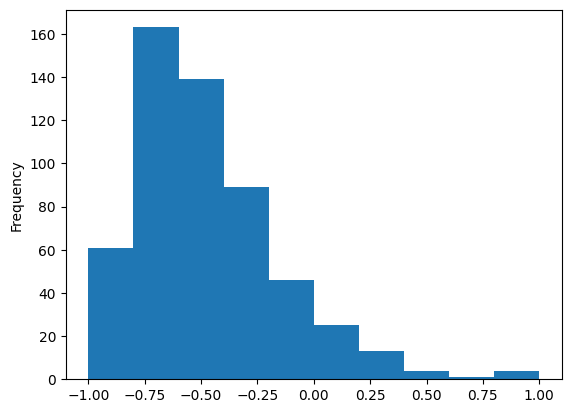

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))

scaled_dataset=pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
scaled_dataset['price'].plot.hist(bins=10)

## StandardScaler (mean 0 and var 1)

<Axes: ylabel='Frequency'>

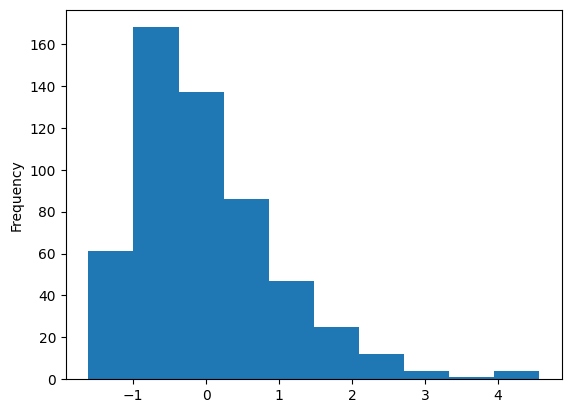

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_dataset=pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
scaled_dataset['price'].plot.hist(bins=10)

In [ ]:
print('mean:', dataset['price'].mean())
print('std:', dataset['price'].std())
print('mean:', scaled_dataset['price'].mean())
print('std:', scaled_dataset['price'].std())

mean: 4766729.247706422
std: 1870439.615657394
mean: 2.0859970224149731e-16
std: 1.0009186956462146


## MaxAbsScaler



<Axes: ylabel='Frequency'>

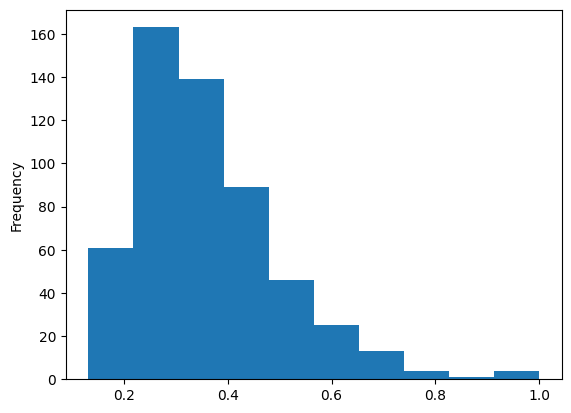

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()

scaled_dataset=pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
scaled_dataset['price'].plot.hist(bins=10)

In [ ]:
import kagglehub
from sklearn.preprocessing import LabelEncoder
path = kagglehub.dataset_download("nicholasjhana/energy-consumption-generation-prices-and-weather")
dataset = pd.read_csv(f'{path}/weather_features.csv')
dataset=dataset.dropna()
dataset=dataset[dataset['weather_main']!='squall']
dataset=dataset.drop(['clouds_all', 'weather_id', 'weather_icon', 'weather_description', 'city_name', 'dt_iso'], axis = 1)
le = LabelEncoder()
for column in dataset.columns:
    if dataset[column].dtype == object:
        dataset[column] = le.fit_transform(dataset[column])

100%|██████████| 3.81M/3.81M [00:00<00:00, 157MB/s]

Extracting files...


# pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline(steps=[("estimator", DecisionTreeClassifier(criterion = 'log_loss', min_samples_leaf = 10))])
pipeline

Pipeline(steps=[('estimator',
                 DecisionTreeClassifier(criterion='log_loss',
                                        min_samples_leaf=10))])

## insert

### normalizer

In [ ]:
from sklearn.preprocessing import Normalizer

pipeline.steps.insert(0, ('norm', Normalizer()))
pipeline

Pipeline(steps=[('norm', Normalizer()),
                ('estimator',
                 DecisionTreeClassifier(criterion='log_loss',
                                        min_samples_leaf=10))])

## featureUnion

### PCA & Function Transformer

In [ ]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer

def identity_func(X):
  return X

combined_features = FeatureUnion([("pca", PCA(n_components=5)), ('passthrough', FunctionTransformer(identity_func,validate=False))])

pipeline.steps.insert(0, ('combined_features', combined_features))

pipeline

Pipeline(steps=[('combined_features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=5)),
                                                ('passthrough',
                                                 FunctionTransformer(func=<function identity_func at 0x7d6e0da8c940>))])),
                ('norm', Normalizer()),
                ('estimator',
                 DecisionTreeClassifier(criterion='log_loss',
                                        min_samples_leaf=10))])

## grid search (accuracy_score)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'combined_features__pca__n_components': [2, 3, 5],
    'estimator__criterion': ['gini', 'entropy', 'log_loss'],
    'estimator__min_samples_leaf': [2, 7, 10]
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=None, scoring='accuracy')
grid_search.fit(X_train, Y_train)

print("Migliori parametri:", grid_search.best_params_)
best_pipeline = grid_search.best_estimator_

y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

print(f"Accuracy on train {accuracy_score(Y_train, y_train_pred)}")
print(f"Accuracy on test {accuracy_score(Y_test, y_test_pred)}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Migliori parametri: {'combined_features__pca__n_components': 2, 'estimator__criterion': 'entropy', 'estimator__min_samples_leaf': 10}
Accuracy on train 0.14460784313725492
Accuracy on test 0.014598540145985401


## pop

In [ ]:
pipeline.steps.pop()

pipeline

Pipeline(steps=[('combined_features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=5)),
                                                ('passthrough',
                                                 FunctionTransformer(func=<function identity_func at 0x7d6e0da8c940>))])),
                ('norm', Normalizer())])

## fit_transform & shape

In [ ]:
pipeline.fit_transform(X_train).shape

(408, 10)

## append

In [ ]:
from sklearn.tree import DecisionTreeClassifier

pipeline.steps.append(("estimator", DecisionTreeClassifier(criterion = 'log_loss', min_samples_leaf = 10)))

pipeline

Pipeline(steps=[('combined_features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=5)),
                                                ('passthrough',
                                                 FunctionTransformer(func=<function identity_func at 0x7d6e0da8c940>))])),
                ('norm', Normalizer()),
                ('estimator',
                 DecisionTreeClassifier(criterion='log_loss',
                                        min_samples_leaf=10))])

In [ ]:
pipeline = Pipeline(steps=[("estimator", SGDRegressor(loss = 'squared_epsilon_insensitive', penalty = 'l1', max_iter=5000))])

## kbest

In [ ]:
from sklearn.feature_selection import SelectKBest

pipeline.steps.insert(0, ('feature', SelectKBest()))
pipeline

Pipeline(steps=[('feature', SelectKBest()),
                ('estimator',
                 SGDRegressor(loss='squared_epsilon_insensitive', max_iter=5000,
                              penalty='l1'))])

## grid search (r2_score)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'feature__k': [1, 2, 3, 4, 5],
}


grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=None, scoring='r2')
grid_search.fit(X_train, Y_train)

print("Migliori parametri:", grid_search.best_params_)
best_pipeline = grid_search.best_estimator_

y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

metrics_sgd_train = evaluate_metrics(Y_train, y_train_pred)
metrics_sgd_test = evaluate_metrics(Y_test, y_test_pred)

# Risultati
print("\nSGD Regressor:")
print(f"Train - MSLE: {metrics_sgd_train[0]:.4f}, R²: {metrics_sgd_train[1]:.4f}")
print(f"Test  - MSLE: {metrics_sgd_test[0]:.4f}, R²: {metrics_sgd_test[1]:.4f}")

Migliori parametri: {'feature__k': 5}

SGD Regressor:
Train - MSLE: 0.0490, R²: 0.6195
Test  - MSLE: 0.0806, R²: 0.5807


In [ ]:
import kagglehub
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

path = kagglehub.dataset_download("saurabhbadole/housing-price-data")
dataset = pd.read_csv(f'{path}/Housing_Price_Data.csv')
dataset=dataset.dropna()
le = LabelEncoder()
for column in dataset.columns:
    if dataset[column].dtype == object:
        dataset[column] = le.fit_transform(dataset[column])

In [ ]:
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


## columnTransformer

### KBinsDiscretizer & stdScaler

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

coltran = ColumnTransformer(transformers=[('discr', KBinsDiscretizer(n_bins=2, strategy='uniform'), ['area']),
                                          ('StdScaler', StandardScaler(), ['bedrooms', 'bathrooms', 'stories'])],
                            remainder='passthrough',
                            force_int_remainder_cols=False)

pipeline = Pipeline(steps=[("coltran", coltran),
                            ("estimator", SGDRegressor(loss = 'squared_epsilon_insensitive', penalty = 'l1', max_iter=5000))
                             ])

pipeline

Pipeline(steps=[('coltran',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('discr',
                                                  KBinsDiscretizer(n_bins=2,
                                                                   strategy='uniform'),
                                                  ['area']),
                                                 ('StdScaler', StandardScaler(),
                                                  ['bedrooms', 'bathrooms',
                                                   'stories'])])),
                ('estimator',
                 SGDRegressor(loss='squared_epsilon_insensitive', max_iter=5000,
                              penalty='l1'))])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset.drop('price', axis=1), dataset['price'], test_size=0.25, random_state=42)
pipeline.fit(X_train, Y_train)

# Modello SGDRegressor
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

metrics_sgd_train = evaluate_metrics(Y_train, y_train_pred)
metrics_sgd_test = evaluate_metrics(Y_test, y_test_pred)

# Risultati
print("\nSGD Regressor:")
print(f"Train - MSLE: {metrics_sgd_train[0]:.4f}, R²: {metrics_sgd_train[1]:.4f}")
print(f"Test  - MSLE: {metrics_sgd_test[0]:.4f}, R²: {metrics_sgd_test[1]:.4f}")


SGD Regressor:
Train - MSLE: 0.0482, R²: 0.6194
Test  - MSLE: 0.0733, R²: 0.6243


# *Show the distribution of the 10 most frequent value for a selected column*

In [ ]:
import kagglehub
path = kagglehub.dataset_download("jessicali9530/kuc-hackathon-winter-2018")
train, test = pd.read_csv(f'{path}/drugsComTrain_raw.csv'), pd.read_csv(f'{path}/drugsComTest_raw.csv')

# barplot

<Axes: xlabel='condition'>

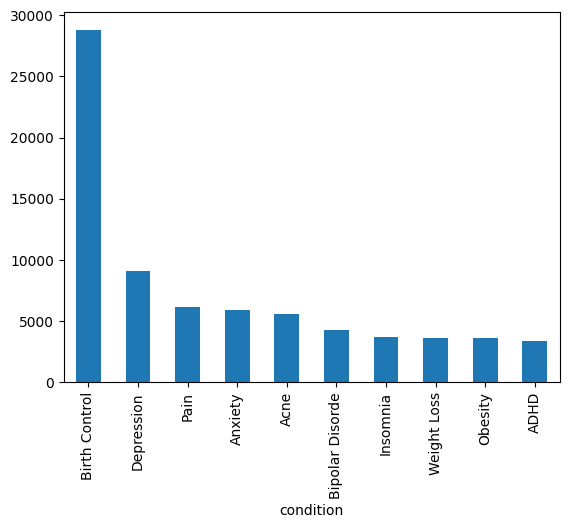

In [ ]:
train['condition'].value_counts().head(10).plot.bar()

<Axes: xlabel='condition'>

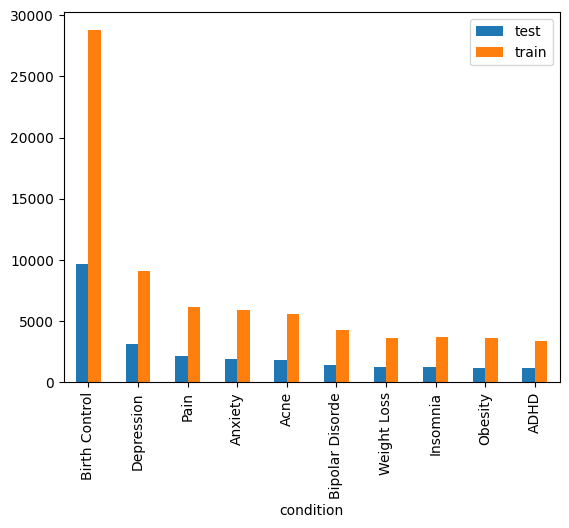

In [ ]:
df=pd.DataFrame()
df['test'], df['train'] = test['condition'].value_counts().head(10), train['condition'].value_counts().head(10)
df.plot.bar()

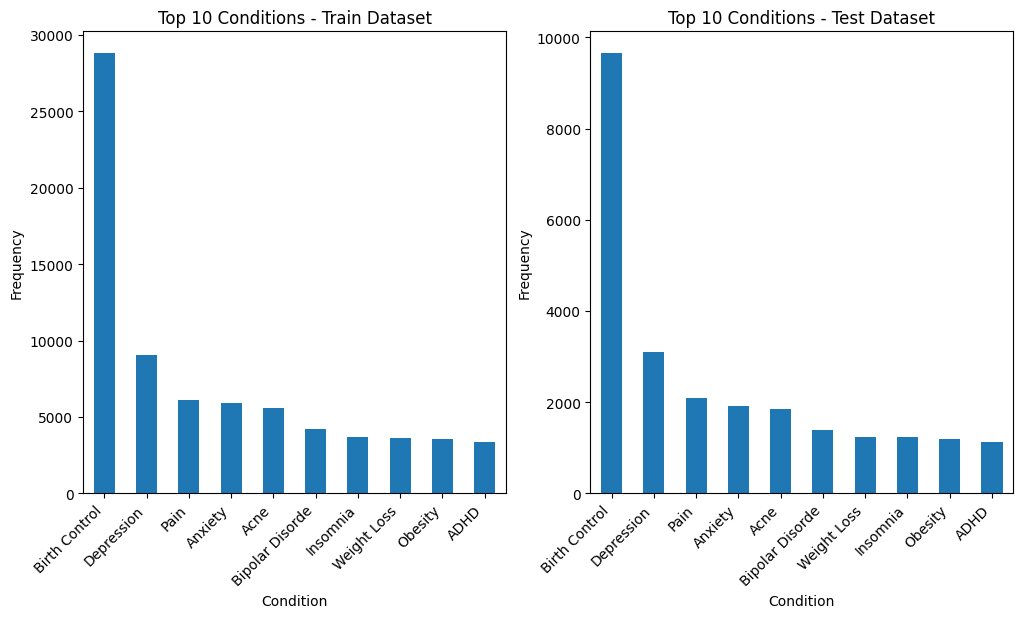

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
train['condition'].value_counts()[:10].plot(kind='bar')
plt.title('Top 10 Conditions - Train Dataset')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
test['condition'].value_counts()[:10].plot(kind='bar')
plt.title('Top 10 Conditions - Test Dataset')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
import kagglehub
from sklearn.preprocessing import LabelEncoder
path = kagglehub.dataset_download("nicholasjhana/energy-consumption-generation-prices-and-weather")
dataset = pd.read_csv(f'{path}/weather_features.csv')
dataset=dataset.dropna()
le = LabelEncoder()
for column in dataset.columns:
    if dataset[column].dtype == object:
        dataset[column] = le.fit_transform(dataset[column])

# *histplot use 10 bins by default*

<Axes: ylabel='Frequency'>

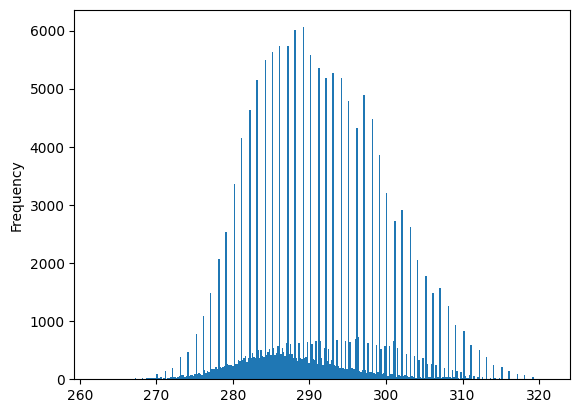

In [ ]:
dataset['temp_max'].plot.hist(bins=320)

## which is the top 5% quantile?

In [ ]:
q=dataset['temp_max'].quantile(q=0.95)
q

306.15

In [ ]:
dataset[dataset['temp_max']>=q]['city_name'].value_counts()

,count
city_name,
3,5931
2,2329
0,664
4,660
1,429


In [ ]:
import kagglehub
path = kagglehub.dataset_download("iabhishekofficial/mobile-price-classification")
dataset = pd.read_csv(f'{path}/train.csv')

# *subplot*

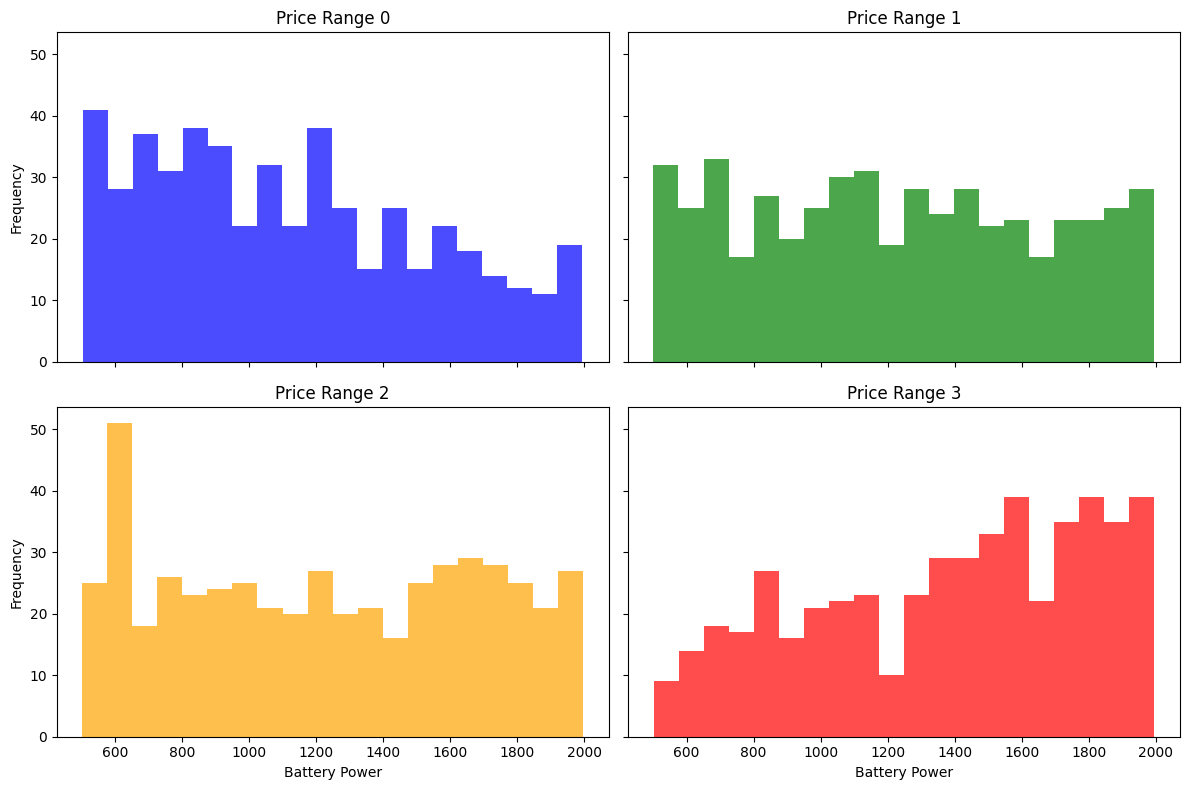

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

price_ranges = [0, 1, 2, 3]
for idx, price_range in enumerate(price_ranges):
    ax = axes[idx // 2, idx % 2]
    dataset[dataset['price_range'] == price_range]['battery_power'].plot.hist(
        bins=20, ax=ax, alpha=0.7, color=['blue', 'green', 'orange', 'red'][idx]
    )
    ax.set_title(f'Price Range {price_range}')
    ax.set_xlabel('Battery Power')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

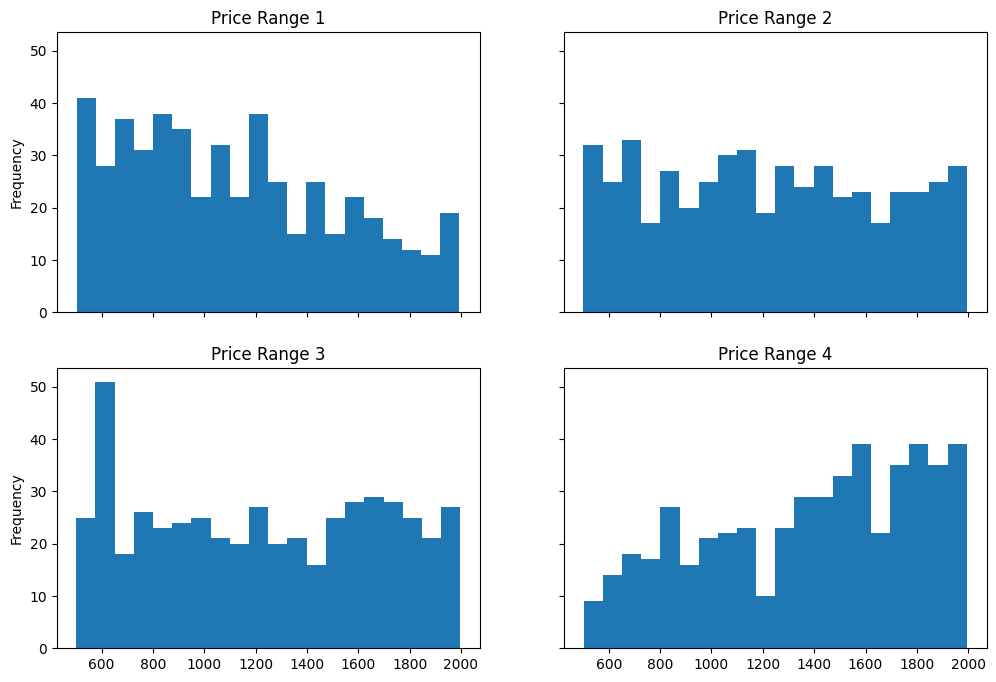

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

dataset[dataset['price_range']==0].groupby('price_range')['battery_power'].plot.hist( bins=20, ax=axes[0,0])
dataset[dataset['price_range']==1].groupby('price_range')['battery_power'].plot.hist( bins=20, ax=axes[0,1])
dataset[dataset['price_range']==2].groupby('price_range')['battery_power'].plot.hist( bins=20, ax=axes[1,0])
dataset[dataset['price_range']==3].groupby('price_range')['battery_power'].plot.hist( bins=20, ax=axes[1,1])

axes[0,0].set_title('Price Range 1')
axes[0,1].set_title('Price Range 2')
axes[1,0].set_title('Price Range 3')
axes[1,1].set_title('Price Range 4')

plt.show()

# using the mean and the standard deviation clean data from outliears
mean_p=pdf['Pressure3pm'].mean()
std_p=pdf['Pressure3pm'].std()
out=3

clean_df = pdf[(pdf['Pressure3pm'] > (mean_p - out * std_p)) & (pdf['Pressure3pm'] < (mean_p + out * std_p))]